In [9]:
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import matplotlib.dates as mdates


%matplotlib inline

url = "https://biapi.nve.no/magasinstatistikk/api/Magasinstatistikk/HentOffentligData"
parameters = {}
# parameters = {"StationId": "6.16.0"}
response = requests.get(url, params=parameters)
magasin = json.loads(response.content)

In [10]:
df = pd.DataFrame(magasin, index=range(len(magasin)))
df['dato_Id'] = pd.to_datetime(df['dato_Id'])
df.head(10) # Don't use print so data look nice 

,dato_Id,omrType,omrnr,iso_aar,iso_uke,fyllingsgrad,kapasitet_TWh,fylling_TWh,neste_Publiseringsdato,fyllingsgrad_forrige_uke,endring_fyllingsgrad
0,2012-07-15,EL,3,2012,28,0.862680,9.113162,7.861740,0001-01-01T00:00:00,0.804672,0.058007
1,2008-12-21,EL,3,2008,51,0.633832,9.113162,5.776213,0001-01-01T00:00:00,0.663356,-0.029525
2,1999-08-15,EL,4,1999,32,0.917086,20.820948,19.094595,0001-01-01T00:00:00,0.920584,-0.003498
3,2007-10-07,EL,3,2007,40,0.939582,9.113162,8.562560,0001-01-01T00:00:00,0.952519,-0.012938
4,2021-03-28,EL,3,2021,12,0.379970,9.113162,3.462726,2021-04-07T13:00:00,0.389627,-0.009658
5,2015-12-27,EL,1,2015,52,0.679757,5.992993,4.073781,0001-01-01T00:00:00,0.683479,-0.003721
6,2001-11-25,EL,4,2001,47,0.827397,20.820948,17.227184,0001-01-01T00:00:00,0.842185,-0.014788
7,2001-08-12,EL,4,2001,32,0.821027,20.820948,17.094560,0001-01-01T00:00:00,0.802414,0.018614
8,2011-09-11,EL,3,2011,36,0.885666,9.113162,8.071219,0001-01-01T00:00:00,0.881239,0.004427
9,2004-07-11,EL,4,2004,28,0.634776,20.820948,13.216633,0001-01-01T00:00:00,0.591789,0.042987


## Data Representation From Territory 1

In [11]:
territory_1 = df[df["omrnr"] == 1]
territory_1 = territory_1.sort_values("dato_Id")
# territory_1 = territory_1[territory_1["dato_Id"] > "2015"]
territory_1

,dato_Id,omrType,omrnr,iso_aar,iso_uke,fyllingsgrad,kapasitet_TWh,fylling_TWh,neste_Publiseringsdato,fyllingsgrad_forrige_uke,endring_fyllingsgrad
10584,1995-01-08,VASS,1,1995,1,0.635756,35.945644,22.852660,0001-01-01T00:00:00,0.668393,-0.032637
129,1995-01-08,EL,1,1995,1,0.621476,5.992993,3.724504,0001-01-01T00:00:00,0.612629,0.008848
9021,1995-01-15,VASS,1,1995,2,0.604701,35.945644,21.736370,0001-01-01T00:00:00,0.635756,-0.031055
5480,1995-01-15,EL,1,1995,2,0.583106,5.992993,3.494550,0001-01-01T00:00:00,0.621476,-0.038370
6337,1995-01-22,EL,1,1995,3,0.550609,5.992993,3.299799,0001-01-01T00:00:00,0.583106,-0.032497
...,...,...,...,...,...,...,...,...,...,...,...
13276,2023-04-02,VASS,1,2023,13,0.285018,35.945644,10.245146,2023-04-12T13:00:00,0.315210,-0.030192
7374,2023-04-09,EL,1,2023,14,0.123397,5.992993,0.739520,2023-04-19T13:00:00,0.160411,-0.037013
13280,2023-04-09,VASS,1,2023,14,0.252069,35.945644,9.060765,2023-04-19T13:00:00,0.284953,-0.032885
7377,2023-04-16,EL,1,2023,15,0.130298,5.992993,0.780874,2023-04-26T13:00:00,0.123397,0.006900


In [12]:
territory_1_VASS = territory_1[territory_1["omrType"] == "VASS"]
territory_1_VASS['SMA5'] = territory_1_VASS['fyllingsgrad'].rolling(5).mean()
territory_1_EL = territory_1[territory_1["omrType"] == "EL"]
territory_1_EL['SMA5'] = territory_1_EL['fyllingsgrad'].rolling(5).mean()

/var/folders/zf/m_xd54ds3msfzd78t7b0s9bh0000gp/T/ipykernel_63520/4176525296.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  territory_1_VASS['SMA5'] = territory_1_VASS['fyllingsgrad'].rolling(5).mean()
/var/folders/zf/m_xd54ds3msfzd78t7b0s9bh0000gp/T/ipykernel_63520/4176525296.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  territory_1_EL['SMA5'] = territory_1_EL['fyllingsgrad'].rolling(5).mean()


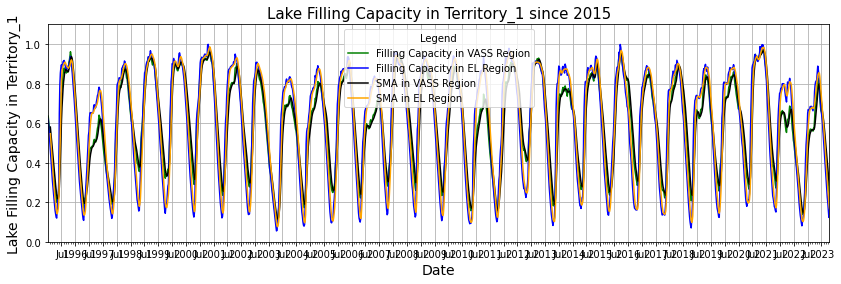

In [13]:
fig, axs = plt.subplots()
x1 = territory_1_VASS["dato_Id"]
y1 = territory_1_VASS['fyllingsgrad']
y2 = territory_1_EL['fyllingsgrad']
y3 = territory_1_VASS['SMA5']
y4 = territory_1_EL['SMA5']
plot1 = axs.plot(x1, y1, color='green', label="Filling Capacity in VASS Region")
plot2 = axs.plot(x1, y2, color='blue', label="Filling Capacity in EL Region")
plot3 = axs.plot(x1, y3, color='black', label="SMA in VASS Region")
plot4 = axs.plot(x1, y4, color='orange', label="SMA in EL Region")

axs.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 7)))
axs.xaxis.set_minor_locator(mdates.MonthLocator())
axs.xaxis.set_major_formatter(mdates.ConciseDateFormatter(axs.xaxis.get_major_locator()))
axs.set_xlabel('Date', fontsize=14)
axs.set_ylabel('Lake Filling Capacity in Territory_1', fontsize=14)
plt.title("Lake Filling Capacity in Territory_1 since 2015", fontsize=15)
plt.legend(loc=9, title="Legend")
plt.gcf().set_size_inches(14, 4)
axs.grid(True)
axs.margins(x=0)
axs.set_ylim(0, 1.1)
plt.show()

## Data Representation From Territory 2

In [14]:
df[df["omrnr"] == 2]

,dato_Id,omrType,omrnr,iso_aar,iso_uke,fyllingsgrad,kapasitet_TWh,fylling_TWh,neste_Publiseringsdato,fyllingsgrad_forrige_uke,endring_fyllingsgrad
34,2005-07-31,EL,2,2005,30,0.791488,33.928802,26.854235,0001-01-01T00:00:00,0.781841,0.009647
35,2006-08-20,EL,2,2006,33,0.506850,33.928802,17.196827,0001-01-01T00:00:00,0.517393,-0.010542
36,1997-11-02,EL,2,1997,44,0.833415,33.928802,28.276777,0001-01-01T00:00:00,0.847499,-0.014084
37,2010-01-03,EL,2,2009,53,0.690358,33.928802,23.423004,0001-01-01T00:00:00,0.722342,-0.031985
38,2013-08-11,EL,2,2013,32,0.737230,33.928802,25.013334,0001-01-01T00:00:00,0.711371,0.025860
...,...,...,...,...,...,...,...,...,...,...,...
13272,1998-07-26,VASS,2,1998,30,0.804233,23.261864,18.707964,0001-01-01T00:00:00,0.758595,0.045639
13274,2022-06-19,VASS,2,2022,24,0.414715,23.261864,9.647043,2022-06-29T13:00:00,0.359275,0.055440
13275,2023-04-02,VASS,2,2023,13,0.383732,23.261864,8.926329,2023-04-12T13:00:00,0.405389,-0.021656
13278,2023-04-09,VASS,2,2023,14,0.361039,23.261864,8.398449,2023-04-19T13:00:00,0.383744,-0.022705


## Data Representation From Territory 3

In [15]:
df[df["omrnr"] == 3]

,dato_Id,omrType,omrnr,iso_aar,iso_uke,fyllingsgrad,kapasitet_TWh,fylling_TWh,neste_Publiseringsdato,fyllingsgrad_forrige_uke,endring_fyllingsgrad
0,2012-07-15,EL,3,2012,28,0.862680,9.113162,7.861740,0001-01-01T00:00:00,0.804672,0.058007
1,2008-12-21,EL,3,2008,51,0.633832,9.113162,5.776213,0001-01-01T00:00:00,0.663356,-0.029525
3,2007-10-07,EL,3,2007,40,0.939582,9.113162,8.562560,0001-01-01T00:00:00,0.952519,-0.012938
4,2021-03-28,EL,3,2021,12,0.379970,9.113162,3.462726,2021-04-07T13:00:00,0.389627,-0.009658
8,2011-09-11,EL,3,2011,36,0.885666,9.113162,8.071219,0001-01-01T00:00:00,0.881239,0.004427
...,...,...,...,...,...,...,...,...,...,...,...
13268,2001-03-11,VASS,3,2001,10,0.508879,28.093166,14.296025,0001-01-01T00:00:00,0.529656,-0.020777
13269,2004-12-12,VASS,3,2004,50,0.727830,28.093166,20.447063,0001-01-01T00:00:00,0.737597,-0.009766
13277,2023-04-02,VASS,3,2023,13,0.361408,28.093166,10.153104,2023-04-12T13:00:00,0.389834,-0.028425
13279,2023-04-09,VASS,3,2023,14,0.335690,28.093166,9.430604,2023-04-19T13:00:00,0.361408,-0.025718


## Data Representation From Territory 4

In [16]:
territory_4 = df[df["omrnr"] == 4]
territory_4 = territory_4.sort_values("dato_Id")
territory_4

,dato_Id,omrType,omrnr,iso_aar,iso_uke,fyllingsgrad,kapasitet_TWh,fylling_TWh,neste_Publiseringsdato,fyllingsgrad_forrige_uke,endring_fyllingsgrad
2362,1995-01-08,EL,4,1995,1,0.557804,20.820948,11.614000,0001-01-01T00:00:00,0.681754,-0.123950
4808,1995-01-15,EL,4,1995,2,0.539854,20.820948,11.240267,0001-01-01T00:00:00,0.557804,-0.017950
436,1995-01-22,EL,4,1995,3,0.521608,20.820948,10.860362,0001-01-01T00:00:00,0.539854,-0.018246
3819,1995-01-29,EL,4,1995,4,0.500999,20.820948,10.431264,0001-01-01T00:00:00,0.521608,-0.020609
7275,1995-02-05,EL,4,1995,5,0.480878,20.820948,10.012341,0001-01-01T00:00:00,0.500999,-0.020120
...,...,...,...,...,...,...,...,...,...,...,...
3454,2023-03-19,EL,4,2023,11,0.472199,20.820948,9.831630,2023-03-29T13:00:00,0.496161,-0.023962
6406,2023-03-26,EL,4,2023,12,0.444358,20.820948,9.251947,2023-04-05T13:00:00,0.472199,-0.027841
7367,2023-04-02,EL,4,2023,13,0.416727,20.820948,8.676647,2023-04-12T13:00:00,0.444358,-0.027631
7370,2023-04-09,EL,4,2023,14,0.392437,20.820948,8.170905,2023-04-19T13:00:00,0.416727,-0.024290


In [17]:
territory_4["omrType"].value_counts()

EL    1476
Name: omrType, dtype: int64

## Data Representation From Territory 5

In [18]:
territory_5 = df[df["omrnr"] == 5]
territory_5 = territory_5.sort_values("dato_Id")
territory_5

,dato_Id,omrType,omrnr,iso_aar,iso_uke,fyllingsgrad,kapasitet_TWh,fylling_TWh,neste_Publiseringsdato,fyllingsgrad_forrige_uke,endring_fyllingsgrad
3239,1995-01-08,EL,5,1995,1,0.616325,17.444773,10.751657,0001-01-01T00:00:00,0.687228,-0.070902
4793,1995-01-15,EL,5,1995,2,0.588366,17.444773,10.263906,0001-01-01T00:00:00,0.616325,-0.027960
6288,1995-01-22,EL,5,1995,3,0.562974,17.444773,9.820947,0001-01-01T00:00:00,0.588366,-0.025392
1660,1995-01-29,EL,5,1995,4,0.531448,17.444773,9.270995,0001-01-01T00:00:00,0.562974,-0.031525
3900,1995-02-05,EL,5,1995,5,0.500525,17.444773,8.731554,0001-01-01T00:00:00,0.531448,-0.030923
...,...,...,...,...,...,...,...,...,...,...,...
1874,2023-03-19,EL,5,2023,11,0.323527,17.444773,5.643850,2023-03-29T13:00:00,0.354960,-0.031433
2464,2023-03-26,EL,5,2023,12,0.304726,17.444773,5.315883,2023-04-05T13:00:00,0.323527,-0.018800
7373,2023-04-02,EL,5,2023,13,0.274945,17.444773,4.796353,2023-04-12T13:00:00,0.304726,-0.029781
7375,2023-04-09,EL,5,2023,14,0.245268,17.444773,4.278641,2023-04-19T13:00:00,0.274945,-0.029677


In [19]:
territory_5["omrType"].value_counts()

EL    1476
Name: omrType, dtype: int64

In [20]:
territory_1 = df[df["omrnr"] == 1]
territory_1 = territory_1.sort_values("dato_Id")
territory_1_VASS = territory_1[territory_1["omrType"] == "VASS"]
territory_1_VASS.tail(30)

,dato_Id,omrType,omrnr,iso_aar,iso_uke,fyllingsgrad,kapasitet_TWh,fylling_TWh,neste_Publiseringsdato,fyllingsgrad_forrige_uke,endring_fyllingsgrad
10618,2022-09-25,VASS,1,2022,38,0.574880,35.945644,20.664433,2022-10-05T13:00:00,0.574421,0.000459
9215,2022-10-02,VASS,1,2022,39,0.617458,35.945644,22.194930,2022-10-12T13:00:00,0.574880,0.042578
10786,2022-10-09,VASS,1,2022,40,0.672205,35.945644,24.162830,2022-10-19T13:00:00,0.617458,0.054747
10516,2022-10-16,VASS,1,2022,41,0.701219,35.945644,25.205776,2022-10-26T13:00:00,0.672205,0.029015
10947,2022-10-23,VASS,1,2022,42,0.717768,35.945644,25.800648,2022-11-02T13:00:00,0.701219,0.016549
11100,2022-10-30,VASS,1,2022,43,0.738662,35.945644,26.551687,2022-11-09T13:00:00,0.717768,0.020894
9450,2022-11-06,VASS,1,2022,44,0.781135,35.945644,28.078417,2022-11-16T13:00:00,0.738662,0.042473
9870,2022-11-13,VASS,1,2022,45,0.828061,35.945644,29.765203,2022-11-23T13:00:00,0.781135,0.046926
10827,2022-11-20,VASS,1,2022,46,0.817852,35.945644,29.398207,2022-11-30T13:00:00,0.828061,-0.010210
10091,2022-11-27,VASS,1,2022,47,0.798374,35.945644,28.698069,2022-12-07T13:00:00,0.817852,-0.019478


In [21]:
territory_1_VASS_max = territory_1_VASS.sort_values("iso_uke")
territory_1_VASS_max.head(5)

,dato_Id,omrType,omrnr,iso_aar,iso_uke,fyllingsgrad,kapasitet_TWh,fylling_TWh,neste_Publiseringsdato,fyllingsgrad_forrige_uke,endring_fyllingsgrad
10584,1995-01-08,VASS,1,1995,1,0.635756,35.945644,22.852660,0001-01-01T00:00:00,0.668393,-0.032637
13236,2019-01-06,VASS,1,2019,1,0.617592,35.945644,22.199757,0001-01-01T00:00:00,0.638009,-0.020416
13116,1996-01-07,VASS,1,1996,1,0.647243,35.945644,23.265583,0001-01-01T00:00:00,0.689543,-0.042299
11375,2018-01-07,VASS,1,2018,1,0.719035,35.945644,25.846178,0001-01-01T00:00:00,0.748563,-0.029528
12001,2017-01-08,VASS,1,2017,1,0.599735,35.945644,21.557863,0001-01-01T00:00:00,0.628375,-0.028640


In [22]:
territory_1_VASS_max = territory_1_VASS[territory_1_VASS["iso_uke"] == 6]
territory_1_VASS_max = territory_1_VASS_max['fyllingsgrad'].max()
territory_1_VASS_max

0.6061197

In [23]:
y_values = territory_1_VASS.sort_values("dato_Id")
y_values = y_values.tail(53)
y_values_capacity = y_values["fyllingsgrad"]
y_values_week = y_values["iso_uke"]
y_values_year = y_values["iso_aar"]
y_values_capacity
y_values_week
y_values_year


10689    2022
11965    2022
11191    2022
12141    2022
11402    2022
8883     2022
11262    2022
9345     2022
10834    2022
11247    2022
10266    2022
8950     2022
10790    2022
12247    2022
9482     2022
9990     2022
9998     2022
11877    2022
10149    2022
12726    2022
10998    2022
11474    2022
10472    2022
10618    2022
9215     2022
10786    2022
10516    2022
10947    2022
11100    2022
9450     2022
9870     2022
10827    2022
10091    2022
11953    2022
11015    2022
10816    2022
10132    2022
11825    2022
12509    2023
10461    2023
10018    2023
10287    2023
12239    2023
11750    2023
10374    2023
11596    2023
12962    2023
9155     2023
11745    2023
9160     2023
13276    2023
13280    2023
13282    2023
Name: iso_aar, dtype: int64

In [24]:
y_values = territory_1_VASS.sort_values("dato_Id")
y_values = y_values.tail(52)
y_values_capacity = list(y_values["fyllingsgrad"])
y_values_week = list(y_values["iso_uke"])
y_values_year = list(y_values["iso_aar"])

max_values = []
min_values = []
for n in range(1, 53):
    week_n = territory_1_VASS[territory_1_VASS["iso_uke"] == n]
    territory_1_VASS_max = week_n['fyllingsgrad'].max()
    territory_1_VASS_min = week_n['fyllingsgrad'].min()
    max_values.append(territory_1_VASS_max)
    min_values.append(territory_1_VASS_min)

table = pd.Series(max_values, name="max_values").to_frame()
table["min_values"] = pd.Series(min_values)
table["y_values_capacity"] = pd.Series(y_values_capacity)
# Remove the week column
# Do not do duplicates
# Use already existed column to plot
table["week"] = range(1, 53)
table["uke"] = pd.Series(y_values_week)
table["aar"] = pd.Series(y_values_year)
table

,max_values,min_values,y_values_capacity,week,uke,aar
0,0.799886,0.403875,0.143290,1,16,2022
1,0.756899,0.370013,0.141957,2,17,2022
2,0.722415,0.357543,0.147331,3,18,2022
3,0.682992,0.342293,0.182631,4,19,2022
4,0.639638,0.320103,0.216802,5,20,2022
5,0.606120,0.293082,0.285540,6,21,2022
6,0.587929,0.270446,0.331547,7,22,2022
7,0.577034,0.241847,0.387909,8,23,2022
8,0.547075,0.215604,0.434078,9,24,2022
9,0.511969,0.190310,0.470452,10,25,2022


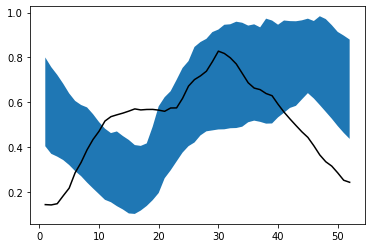

In [25]:
fig, ax = plt.subplots()
ax.fill_between(table["week"], table["max_values"], table["min_values"])
ax.plot(table["week"], table["y_values_capacity"], linestyle="-", color="black")
plt.show()